In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
tf.__version__

'2.15.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Computer Vision Masterclass/Datasets/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

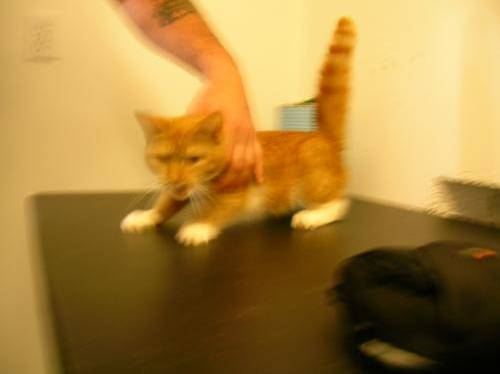

In [9]:
load_img('/content/cat_dog_2/training_set/cat/cat.0.jpg')

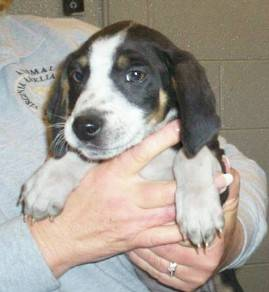

In [15]:
load_img('/content/cat_dog_2/training_set/dog/dog.10.jpg')

## Train and Test Set

In [17]:
train_generator=ImageDataGenerator(rescale=1./255,
                                   rotation_range=7,
                                    horizontal_flip=True,
                                   zoom_range=0.2)
train_dataset=train_generator.flow_from_directory('/content/cat_dog_2/training_set',
                                                  shuffle=True,
                                                  batch_size=32,
                                                  target_size=(64,64),
                                                  class_mode='categorical') #use binary if have only one output neuron

Found 4000 images belonging to 2 classes.


In [18]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [19]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [20]:
test_generator=ImageDataGenerator(rescale=1./255)
test_dataset=test_generator.flow_from_directory('/content/cat_dog_2/test_set',
                                                  shuffle=False, #always false here
                                                  batch_size=1,
                                                  target_size=(64,64),
                                                  class_mode='categorical') #use binary if have only one output neuron

Found 1000 images belonging to 2 classes.


In [21]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [22]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Training the Model

In [24]:
network1=Sequential()
network1.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
network1.add(MaxPooling2D(pool_size=(2,2)))

network1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network1.add(MaxPooling2D(pool_size=(2,2)))

# network1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
# network1.add(MaxPooling2D(pool_size=(2,2)))

network1.add(Flatten())
network1.add(Dense(units=1,activation='relu'))
network1.add(Dense(units=1,activation='relu'))
network1.add(Dense(units=2,activation='softmax'))

network1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 1)                

In [43]:
(1152+2)//2


577

In [44]:
network1=Sequential()
network1.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
network1.add(MaxPooling2D(pool_size=(2,2)))

network1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network1.add(MaxPooling2D(pool_size=(2,2)))

network1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
network1.add(MaxPooling2D(pool_size=(2,2)))

network1.add(Flatten())
network1.add(Dense(units=577,activation='relu'))
network1.add(Dense(units=577,activation='relu'))
network1.add(Dense(units=2,activation='softmax'))

network1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 32)         

In [45]:
network1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [46]:
network1.fit_generator(train_dataset,epochs=15)

Epoch 1/15


<ipython-input-46-1943705c608f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  network1.fit_generator(train_dataset,epochs=15)


125/125 [==============================] - 14s 92ms/step - loss: 0.6929 - accuracy: 0.5090
Epoch 2/15
125/125 [==============================] - 11s 86ms/step - loss: 0.6850 - accuracy: 0.5565
Epoch 3/15
125/125 [==============================] - 10s 82ms/step - loss: 0.6704 - accuracy: 0.5817
Epoch 4/15
125/125 [==============================] - 12s 97ms/step - loss: 0.6448 - accuracy: 0.6360
Epoch 5/15
125/125 [==============================] - 11s 90ms/step - loss: 0.6169 - accuracy: 0.6480
Epoch 6/15
125/125 [==============================] - 10s 78ms/step - loss: 0.5919 - accuracy: 0.6785
Epoch 7/15
125/125 [==============================] - 11s 88ms/step - loss: 0.5569 - accuracy: 0.7138
Epoch 8/15
125/125 [==============================] - 11s 91ms/step - loss: 0.5434 - accuracy: 0.7280
Epoch 9/15
125/125 [==============================] - 12s 92ms/step - loss: 0.5179 - accuracy: 0.7410
Epoch 10/15
125/125 [==============================] - 12s 93ms/step - loss: 0.4990 - accurac

In [47]:
#Nice

In [48]:
y_test=test_dataset.classes

In [49]:
predictions=network1.predict(test_dataset)
predictions

1000/1000 [==============================] - 3s 3ms/step


array([[0.29420596, 0.70579404],
       [0.10945051, 0.89054954],
       [0.34186324, 0.6581367 ],
       ...,
       [0.02552256, 0.97447747],
       [0.05860442, 0.94139564],
       [0.01134727, 0.98865277]], dtype=float32)

In [50]:
predictions = np.argmax(predictions, axis = 1) #if max at col 0 it return 0 otherwise 1
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.759

In [52]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[349, 151],
       [ 90, 410]])

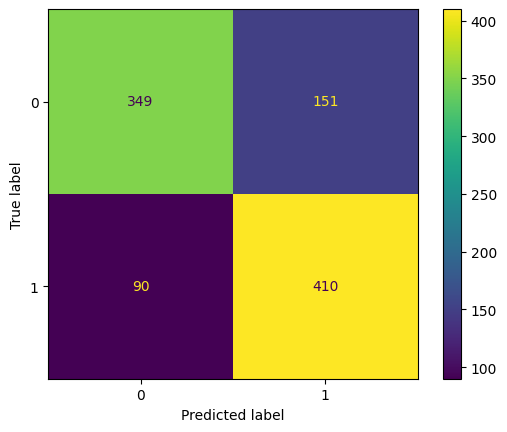

In [54]:
ConfusionMatrixDisplay(cm).plot()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       500
           1       0.73      0.82      0.77       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



In [56]:
model_json = network1.to_json()
with open('network1.json','w') as json_file:
  json_file.write(model_json)

In [58]:
from keras.models import save_model
network_saved = save_model(network1, '/content/weights.hdf5')

<ipython-input-58-96763932514e>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network_saved = save_model(network1, '/content/weights.hdf5')


In [60]:
with open('network1.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_7_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_7", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null

In [61]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [62]:
network_loaded.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 32)         

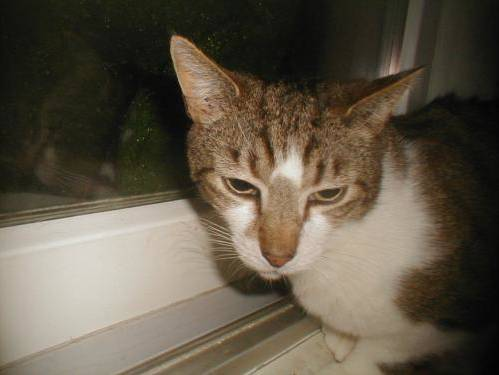

In [90]:
load_img('/content/cat_dog_2/test_set/cat/cat.3510.jpg')

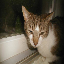

In [92]:
image=cv.imread('/content/cat_dog_2/test_set/cat/cat.3510.jpg')
image = cv.resize(image, (64, 64))
cv2_imshow(image)

In [93]:
image = image / 255
image

array([[[0.05098039, 0.07058824, 0.06666667],
        [0.05882353, 0.07843137, 0.0745098 ],
        [0.05882353, 0.09019608, 0.08627451],
        ...,
        [0.0745098 , 0.09803922, 0.09411765],
        [0.05882353, 0.08235294, 0.07843137],
        [0.05882353, 0.06666667, 0.06666667]],

       [[0.05490196, 0.0745098 , 0.07058824],
        [0.05882353, 0.07843137, 0.0745098 ],
        [0.05882353, 0.09019608, 0.08627451],
        ...,
        [0.07058824, 0.09411765, 0.09019608],
        [0.05098039, 0.0745098 , 0.07058824],
        [0.05098039, 0.05882353, 0.05882353]],

       [[0.04313725, 0.0627451 , 0.05882353],
        [0.05882353, 0.07843137, 0.0745098 ],
        [0.04705882, 0.07843137, 0.0745098 ],
        ...,
        [0.07058824, 0.09411765, 0.09019608],
        [0.05098039, 0.0745098 , 0.07058824],
        [0.05098039, 0.05882353, 0.05882353]],

       ...,

       [[0.40392157, 0.49019608, 0.52941176],
        [0.45098039, 0.52156863, 0.56470588],
        [0.41960784, 0

In [94]:
image.shape

(64, 64, 3)

In [95]:
image = image.reshape(-1, 64, 64, 3)
image.shape

(1, 64, 64, 3)

In [96]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.5605945 , 0.43940547]], dtype=float32)>

In [97]:
result = np.argmax(result)
result

0

In [98]:
test_dataset.class_indices


{'cat': 0, 'dog': 1}

In [99]:
if result == 0:
  print('Cat')
else:
  print('Dog')

Cat
